In [1]:
library(readxl)
library(boot)

## Females that survived

In [2]:
titanic <- read_excel('Titanic-Survival-Data.xlsx')

In [70]:
str(titanic)

Classes 'tbl_df', 'tbl' and 'data.frame':	2201 obs. of  5 variables:
 $ Class       : chr  "Coach" "Coach" "Coach" "Coach" ...
 $ Gender      : chr  "Female" "Female" "Female" "Female" ...
 $ Age         : num  20 21 26 26 36 41 41 45 45 48 ...
 $ Status      : chr  "Survived" "Survived" "Survived" "Died" ...
 $ ChildorAdult: chr  "Adult" "Adult" "Adult" "Adult" ...


In [55]:
femaleSurvivors <- subset(titanic, Gender == "Female" & Status == "Survived")

In [56]:
summary(femaleSurvivors$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   32.75   48.00   46.31   62.00   80.00 

In [57]:
length(femaleSurvivors$Age)
sd(femaleSurvivors$Age)

[1] 344

[1] 19.57667

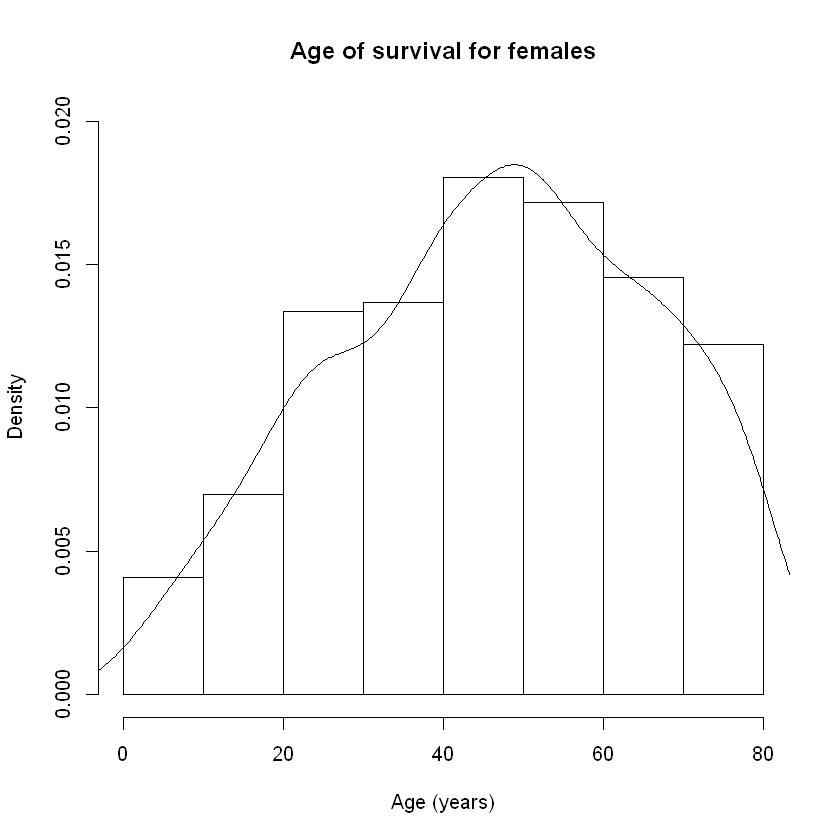

In [58]:
hist(femaleSurvivors$Age, freq=F, ylim = c(0,0.02), main = "Age of survival for females", xlab = "Age (years)")
lines(density(femaleSurvivors$Age))

In [87]:
medianBoot <- function(x, d) {
    return(median(x[d]))
}
femaleMedian <- boot(femaleSurvivors$Age, medianBoot, 1000)
boot.ci(femaleMedian, type = "basic")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = femaleMedian, type = "basic")

Intervals : 
Level      Basic         
95%   (46.0, 51.5 )  
Calculations and Intervals on Original Scale

## Males that survived

In [60]:
maleSurvivors <- subset(titanic, Gender == "Male" & Status == "Survived")

In [61]:
summary(maleSurvivors$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   28.00   45.00   44.38   61.00   80.00 

In [62]:
length(maleSurvivors$Age)
sd(maleSurvivors$Age)

[1] 367

[1] 19.80343

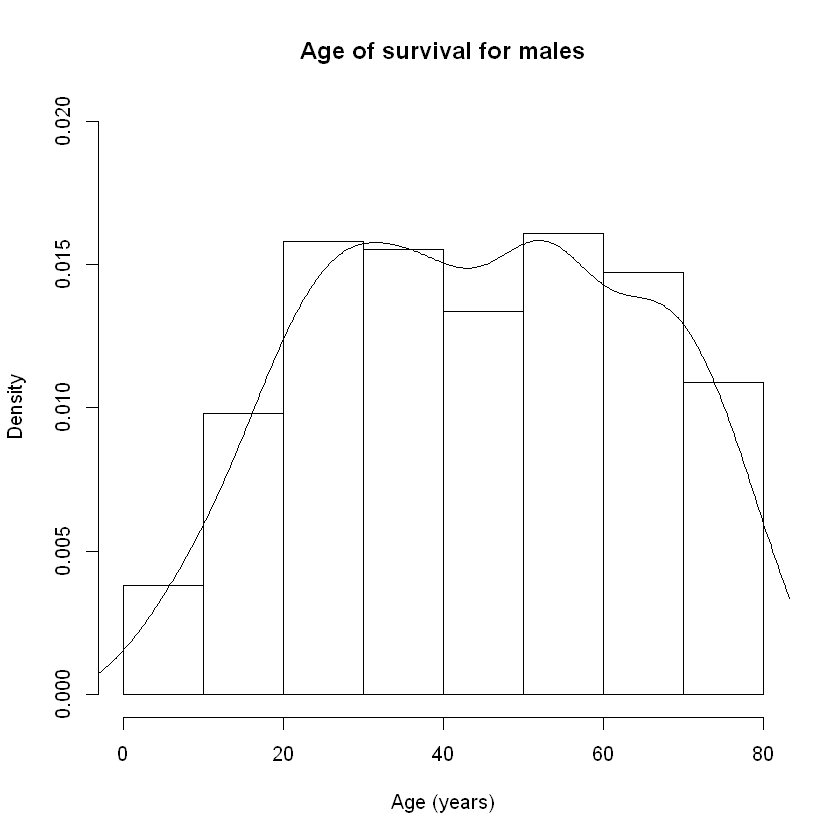

In [63]:
hist(maleSurvivors$Age, freq=F, ylim = c(0,0.02), main = "Age of survival for males", xlab = "Age (years)", breaks = 8)
lines(density(maleSurvivors$Age))

In [64]:
maleMedian <- boot(maleSurvivors$Age, medianBoot, 1000)
boot.ci(maleMedian, type = "basic")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = maleMedian, type = "basic")

Intervals : 
Level      Basic         
95%   (42, 50 )  
Calculations and Intervals on Original Scale

In [94]:
meanDiff <- function(x, i, j) {
    medianMale <- mean(x$Age[i][x$Gender == "Male" & x$Status == "Survived"])
    medianFemale <- mean(x$Age[j][x$Gender == "Female" & x$Status == "Survived"])
    return(medianMale - medianFemale)
}
meanDiffBoot <- boot(titanic, meanDiff, 1000)
meanDiffBoot$t0
boot.ci(meanDiffBoot, 0.96, "basic")

[1] -1.929393

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = meanDiffBoot, conf = 0.96, type = "basic")

Intervals : 
Level      Basic         
96%   (-7.013, -2.497 )  
Calculations and Intervals on Original Scale

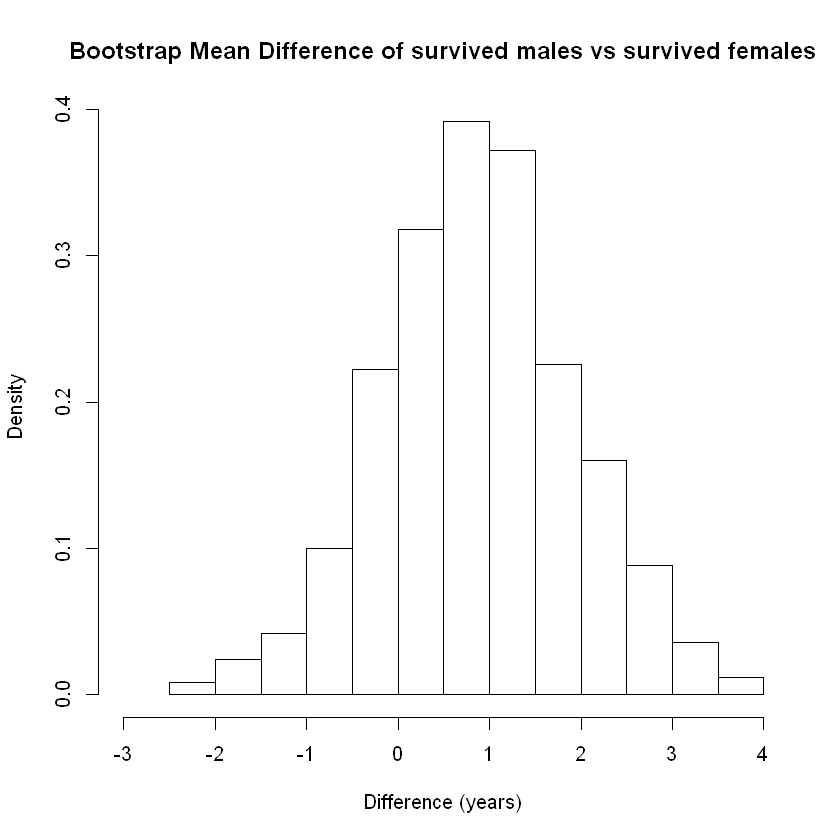

In [101]:
hist(meanDiffBoot$t, freq=F, main = "Bootstrap Mean Difference of survived males vs survived females", xlab = "Difference (years)", xlim = c(-3,4))

In [109]:
propDiff <- function(x, i, j) {
    numMale <- length(x$Age[i][x$Gender == "Male" & x$Age > 35])
    numSurvivedMale <- length(x$Age[i][x$Gender == "Male" & x$Status == "Survived" & x$Age > 35])
    numFemale <- length(x$Age[j][x$Gender == "Female" & x$Age > 35])
    numSurvivedFemale <- length(x$Age[j][x$Gender == "Female" & x$Status == "Survived" & x$Age > 35])
    return(numSurvivedMale/numMale - numSurvivedFemale/numFemale)
}
propDiffBoot <- boot(titanic, propDiff, 1000)
propDiffBoot
boot.ci(propDiffBoot, 0.95, "basic")


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = titanic, statistic = propDiff, R = 1000)


Bootstrap Statistics :
     original  bias    std. error
t1* -0.562059       0           0

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = propDiffBoot, conf = 0.95, type = "basic")

Intervals : 
Level      Basic         
95%   (-0.5621, -0.5621 )  
Calculations and Intervals on Original Scale